# Lab 19 
### Rex McArthur

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad

Problem 1

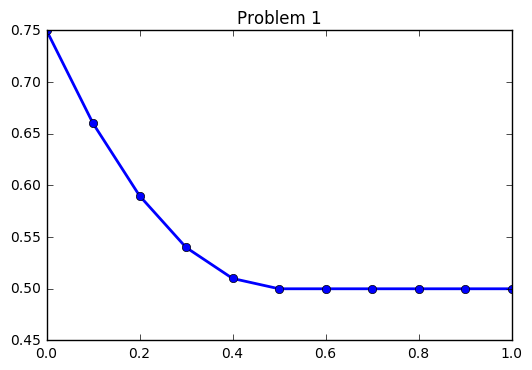

In [2]:
def f(x):
    x = np.array([x])
    out = -np.ones(x.shape)
    m = np.where(x<.5)
    out[m] = -6*x[m]**2. + 3.*x[m] - 1.
    return out

def u(x):
    return (x+1./4)**2. + 1./4

def integral_of_f(x):
    # out = \int_0^x f(s) ds
    out = np.array([quad(f, 0, xi)[0] for xi in x])
    return out

def derivative_of_u(x):
    # out = u'(x)
    out = 2*x + .5
    return out

x = np.linspace(0,1,11)
F, u_p = integral_of_f(x), derivative_of_u(x)
c0, c1 = 3/8, 5/4

def sum_of_squares(alpha):
    sum_val = np.sum( (((c0 - F)/alpha - u_p)**2))
    return sum_val
    return np.sum( (((c0 - F)/alpha) - u_p )**2. )

guess = (1./4)*(3-x)
sol = minimize(sum_of_squares, guess)

plt.plot(x,sol.x,'-ob',linewidth=2)
plt.title('Problem 1')
plt.show()

## Problem 2

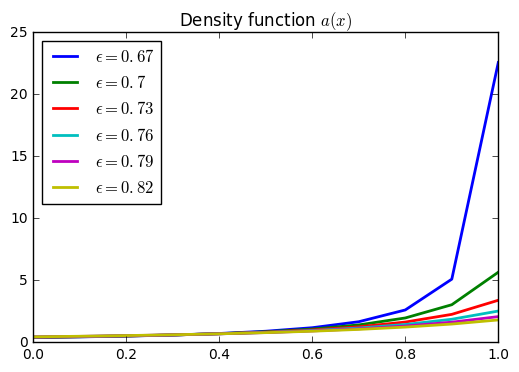

In [9]:
epsilons = np.arange(.67,.85,.03)

def f(x):
    return -1

def u(x,eps):
    return x + 1 + eps*np.sin(eps**-2 * x)

def integral_of_f(x):
    out = np.array([quad(f, 0, xi)[0] for xi in x])
    return out

def derivative_of_u(x,eps):
    out = 1 + (eps**-1) * np.cos(eps**-2 * x)
    return out



def sum_of_squares(alpha):
    return np.sum( (((c0 - F)/alpha) - u_p )**2. )
    
for eps in epsilons:
    x = np.linspace(0,1,11)
    F, u_p = integral_of_f(x), derivative_of_u(x, eps)
    c0, c1 = 1, 2
    guess = (1./4)*(3-x)
    sol = minimize(sum_of_squares, guess)

    plt.plot(x,sol.x,linewidth=2, label = r'$\epsilon = {}$'.format(eps))
plt.title(r'Density function $a(x)$')
plt.legend(loc='best')
plt.show()